1/1 [==============================] - 3s 3s/step


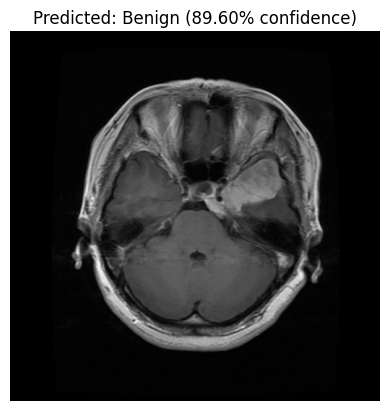

Predicted Class: Benign
Confidence: 89.60%


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# ================================
# 1. Load Saved Model
# ================================
model = keras.models.load_model("newsofttissuetumor.h5")

# Same class names as training
class_names = ['Benign', 'Malignant', 'No Tumor']
# <-- update with your real classes

# ================================
# 2. Load and Preprocess Image
# ================================
img_path = "1.png"   # <-- change to your test image
img_size = (224, 224)   # must match training

img = image.load_img(img_path, target_size=img_size)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)   # add batch dimension

# ⚠️ Do NOT divide by 255.0 if you didn't do it in training
# image_dataset_from_directory already returns scaled tensors [0,255]
# But EfficientNetV2 expects preprocessed input
img_array = keras.applications.efficientnet_v2.preprocess_input(img_array)

# ================================
# 3. Make Prediction
# ================================
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])
confidence = np.max(predictions[0]) * 100

# ================================
# 4. Show Result
# ================================
plt.imshow(image.load_img(img_path))
plt.axis("off")
plt.title(f"Predicted: {class_names[predicted_class]} ({confidence:.2f}% confidence)")
plt.show()

print(f"Predicted Class: {class_names[predicted_class]}")
print(f"Confidence: {confidence:.2f}%")
